# Phase Shift in CMB Spectra — Example Usage

This notebook demonstrates how to use the `classPhase` modifications for analyzing the CMB phase shift using either the Spectrum-Based Template (SBT) or the Perturbation-Based Template (PBT) methods.

In [9]:
# Plot results for visualization
import math
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from tqdm import trange
import matplotlib as mpl
import matplotlib.patches as mpatches

from classy import Class
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import AutoMinorLocator, LogLocator, NullFormatter
plt.style.use('mine.mplstyle')
plt.rcParams["axes.axisbelow"] = False

In [2]:
#Fiducial Cosmo parameters:
ombh2_fid = 0.02238 
omch2_fid =0.12011
Neff_fid=3.044
a_nu=8/7*(11/4)**(4/3)
ln1010A_s_fid= 3.0448
A_s_fid=np.exp(ln1010A_s_fid)*1e-10
ns_fid=0.96605
tau_reio_fid=0.0543
YHe_fid=0.24534
common_settings = {'output' :'tCl,pCl,lCl',
                   'lensing':'yes',
                   # LambdaCDM parameters
                  '100*theta_s':1.04178, #We are fixing the value of the sound horizon (not h!)
                   'omega_b':ombh2_fid,
                   'ln10^{10}A_s':ln1010A_s_fid,
                   'n_s':ns_fid,
                   'tau_reio':tau_reio_fid,
                    'N_ur' : Neff_fid,
                    'omega_cdm': omch2_fid,
                    'YHe' : YHe_fid,
                   'gauge':'newtonian',
                   'l_max_scalars': 5000
            }

def Cl_computer(cosmoClass,ell_max=4000):
    conv_factor=(2.726*10**(6))**2/10**(3) #Conversion factor from dimensionless units to 10^3 \muK^2
    cls = cosmoClass.lensed_cl(ell_max)
    ells = cls['ell'][2:]
    dTTs = cls['tt'][2:]*(ells*(ells+1))/(2*np.pi)*conv_factor
    dEEs = cls['ee'][2:]*ells*(ells+1)/(2*np.pi)*conv_factor
    dTEs = cls['te'][2:]*ells*(ells+1)/(2*np.pi)*conv_factor
    del cls
    return ells,dTTs,dEEs,dTEs

In [23]:
# Initialize CLASS with custom parameters
cosmo_fid=Class()
cosmo_fid.set(common_settings)
cosmo_fid.compute()
cls_fid=Cl_computer(cosmo_fid)
del cosmo_fid

In [4]:
# Initialize CLASS with the SBT method to induce a phase-shift
N_phase_val=1

cosmo_phase_sbt=Class()
cosmo_phase_sbt.set(common_settings)
cosmo_phase_sbt.set({'N_phase':N_phase_val})
cosmo_phase_sbt.compute()
cls_phase_sbt=Cl_computer(cosmo_phase_sbt)
del cosmo_phase_sbt

In [24]:
# Initialize CLASS with the PBT method to induce a phase-shift
cosmo_phase_pbt=Class()
cosmo_phase_pbt.set(common_settings)
cosmo_phase_pbt.set({'N_phase':N_phase_val, 'perturbation_based_shift':'yes'})
cosmo_phase_pbt.compute()
cls_phase_pbt=Cl_computer(cosmo_phase_pbt)
del cosmo_phase_pbt

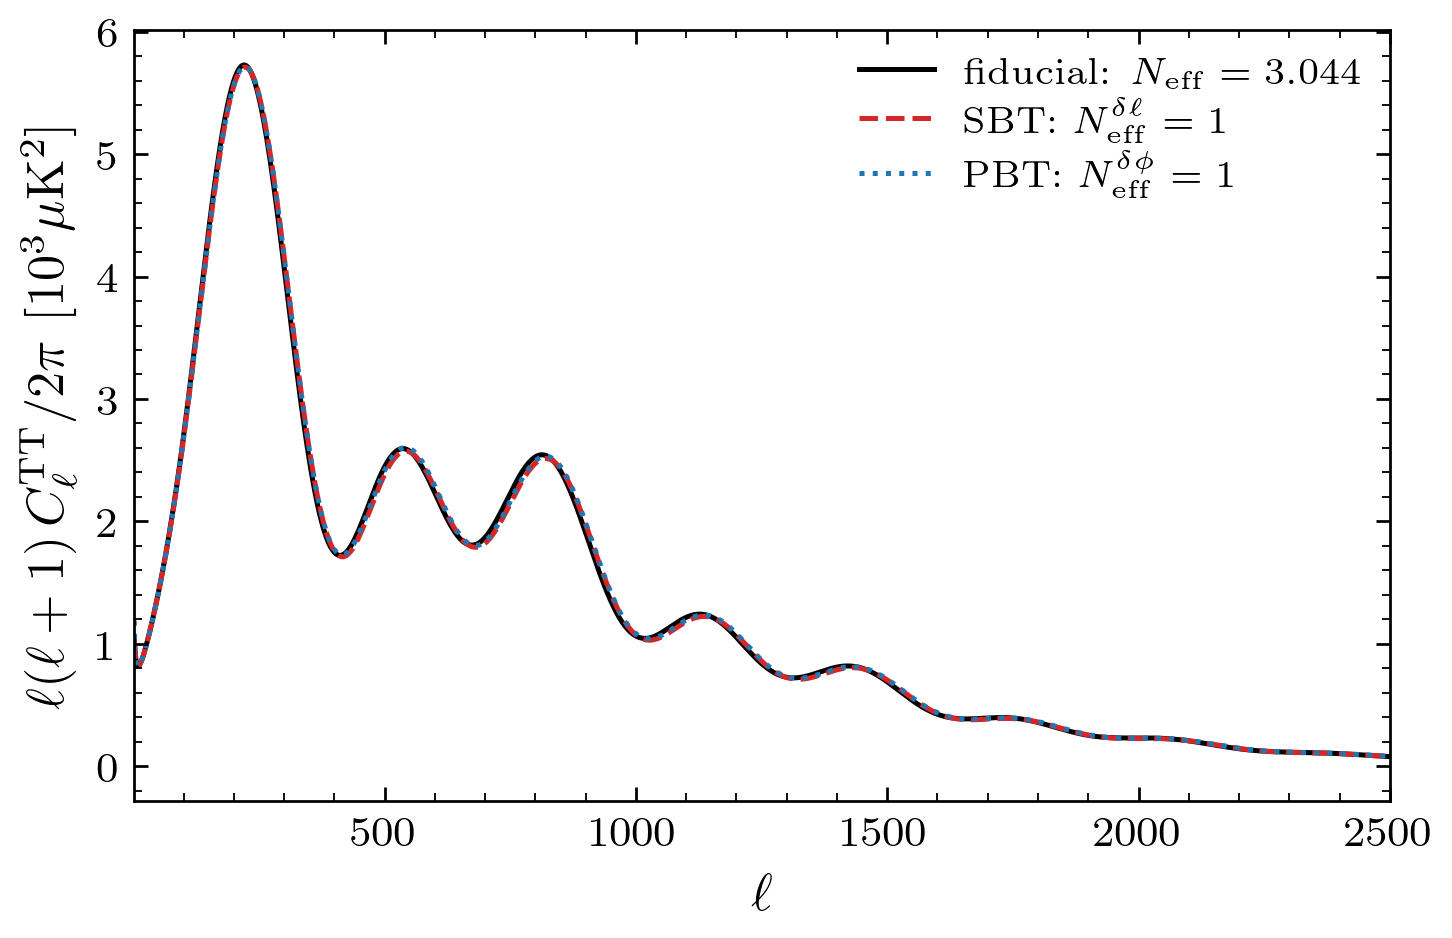

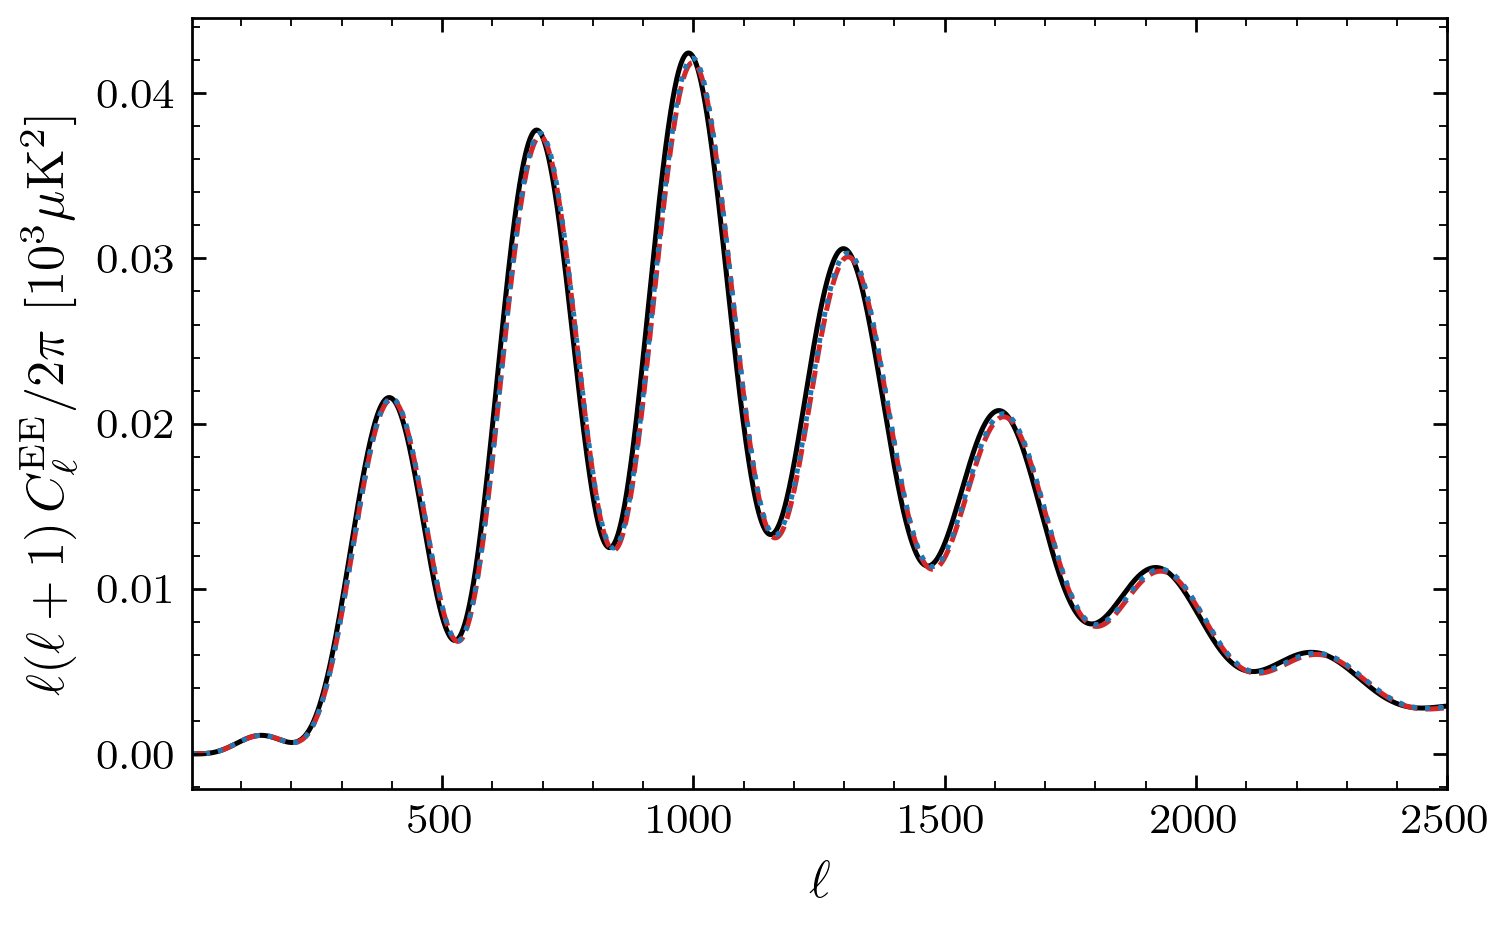

In [25]:
# Plot results for visualization
plt.plot(cls_fid[0],cls_fid[1],lw=1,c='k',label=r'fiducial: $N_{\rm eff}=3.044$')
plt.plot(cls_phase_sbt[0],cls_phase_sbt[1],lw=1,ls='--',c='tab:red',label=r'SBT: $N^{\delta\ell}_{\rm eff}=1$')
plt.plot(cls_phase_pbt[0],cls_phase_pbt[1],lw=1,ls=':',c='tab:blue',label=r'PBT: $N^{\delta\phi}_{\rm eff}=1$')
plt.ylabel(r'$\ell(\ell+1)\,C_{\ell}^{\rm TT}/2\pi\,\,[10^3 \mu{\rm K}^2]$')
plt.xlabel("$\ell$")
plt.legend()
plt.xlim(2,2500)
plt.show()
plt.close()
plt.plot(cls_fid[0],cls_fid[2],lw=1,c='k')
plt.plot(cls_phase_sbt[0],cls_phase_sbt[2],lw=1,ls='--',c='tab:red')
plt.plot(cls_phase_pbt[0],cls_phase_pbt[2],lw=1,ls=':',c='tab:blue')
plt.ylabel(r'$\ell(\ell+1)\,C_{\ell}^{\rm EE}/2\pi\,\,[10^3 \mu{\rm K}^2]$')
plt.xlabel("$\ell$")
plt.xlim(2,2500)
plt.show()
plt.close()